In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.metrics import mean_squared_error


In [13]:
data = pd.read_excel('https://github.com/Dvir-fridman/Assignment-2--machine--learning/raw/main/dataset.xlsx', engine='openpyxl')
data

,manufactor,Year,model,Hand,Gear,capacity_Engine,Engine_type,Prev_ownership,Curr_ownership,Area,City,Price,Pic_num,Cre_date,Repub_date,Description,Color,Km,Test,Supply_score
0,יונדאי,2015,i35,2,אוטומטית,1600.0,בנזין,פרטית,פרטית,רעננה - כפר סבא,רעננה,51000,2.0,2023-11-07 00:00:00,2023-11-07 00:00:00,['רכב שמור בקנאות\nמוכרת עקב קבלת רכב חברה'],כחול כהה מטאלי,144000.0,NaN,NaN
1,ניסאן,2018,ניסאן מיקרה,1,אוטומטית,1200.0,בנזין,פרטית,פרטית,מושבים בשרון,אבן יהודה,49000,0.0,2022-06-04 00:00:00,22/05/2022,['שמורה כל התוספות'],כחול בהיר,69000.0,NaN,NaN
2,סוזוקי,2010,סוזוקי סוויפט,1,אוטומטית,1450.0,בנזין,NaN,NaN,רמת,רמת,22500,1.0,29/10/2022,29/10/2022,['רכב במצב מתוחזק ברמה גבוהה טסט עד אפריל 2023'],NaN,145000.0,NaN,NaN
3,טויוטה,2016,אוריס,1,טיפטרוניק,1600.0,בנזין,פרטית,פרטית,נס ציונה - רחובות,רחובות,63000,5.0,16/05/2024,16/05/2024,['אוטו במצב חדש!! שמור בקנאות!! נהג יחיד מטופל...,אפור מטאלי,27300.0,NaN,NaN
4,קיה,2012,פיקנטו,1,אוטומטית,1248.0,בנזין,NaN,NaN,"ראשל""צ והסביבה",ראשון לציון,37000,1.0,13/06/2022,13/06/2022,['שמור'],NaN,70000.0,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,סקודה,2016,סקודה אוקטביה (2016),2,אוטומטית,1400.0,בנזין,NaN,NaN,ראש העין והסביבה,כפר קאסם,60000,1.0,18/07/2022,18/07/2022,['רכב שמור &lt;br/&gt;&lt;br/&gt;פירוט:&lt;br/...,NaN,180.0,NaN,NaN
1496,אלפא רומיאו,2013,אלפא רומיאו ג'ולייטה,4,ידנית,1400.0,בנזין,NaN,NaN,חיפה וחוף הכרמל,חיפה,45000,0.0,44791,44791,['פרטית \r\nמכונית יפיפיה ללא שום תאונות ואו ת...,NaN,160000.0,NaN,NaN
1497,סקודה,2014,סקודה ראפיד (2014),1,אוטומטית,1400.0,בנזין,NaN,NaN,NaN,כפר מנדא,30000,1.0,30/08/2022,30/08/2022,['רכב נקי גיר שילדה מנוע במצב מעולה &lt;br/&gt...,NaN,NaN,NaN,NaN
1498,ניסאן,2011,ניסאן ג'וק JUKE,3,אוטומטית,1600.0,בנזין,פרטית,פרטית,אשדוד - אשקלון,אשדוד,28000,0.0,31/08/2023,2023-09-11 00:00:00,"['רכב מתוחזק היטב ללא תאונות או תקלות, טסט עד ...",אפור מטאלי,118000.0,81,NaN


**Checking the data values**

In [3]:
data['manufactor'].unique() # Lexsus = לקסוס
data['Year'].unique() 
data['model'].unique() 
data['Hand'].unique() 
data['Gear'].unique() # אוטומטית = אוטומט , NaN, לא מוגדר
data['capacity_Engine'].unique() #NaN
data['Engine_type'].unique() #לשנות היבריד=היברידי, NaN 
data['Prev_ownership'].unique()  # אחר NaN  לא מוגדר 
data['Curr_ownership'].unique()   # אחר NaN  לא מוגדר 
data['Area'].unique()
data['City'].unique()
data['Price'].unique()  
data['Pic_num'].unique() #NaN 
data['Cre_date'].unique() # להוריד ערכים לא קשורים, לשנות פורמט
data['Repub_date'].unique() # להוריד ערכים לא קשורים, לשנות פורמט
data['Description'].unique() # לסדר תווים מיוחדים
data['Color'].unique()# לאחד צבעים, NaN
data['Km'].unique()  #NaN 
data['Test'].unique() # מינוס ,  להוריד ערכים לא קשורים, לשנות פורמט, NaN
data['Supply_score'].unique() #נאן

array([       nan, 4.0000e+00, 3.5700e+02, 5.0000e+00, 5.7000e+01,
       6.0000e+00, 2.0000e+01, 6.8320e+03, 1.1000e+01, 0.0000e+00,
       2.9510e+03, 6.0200e+02, 2.7100e+03, 6.9170e+03, 1.5000e+01,
       9.0000e+00, 8.9000e+01, 7.3600e+02, 1.0000e+00, 1.3900e+02,
       7.0000e+00, 1.4000e+01, 8.0100e+02, 5.9700e+02, 1.9800e+03,
       1.0000e+01, 7.6700e+02, 3.0000e+01, 5.0400e+02, 1.5890e+03,
       2.0100e+02, 6.7100e+02, 1.6190e+03, 3.1400e+02, 3.7100e+02,
       4.3760e+03, 2.4000e+01, 5.8000e+02, 3.3490e+03, 3.0000e+00,
       6.6600e+02, 2.4870e+03, 4.5430e+03, 5.1200e+02, 5.6090e+03,
       1.2540e+03, 2.5070e+03, 1.2380e+03, 2.6740e+03, 2.2100e+02,
       1.6508e+04, 1.1500e+02, 2.3170e+03, 2.3000e+01, 1.5900e+03,
       1.8000e+01, 1.5420e+03, 3.1460e+03, 9.5900e+02, 1.4440e+03,
       6.7200e+02, 3.5400e+02, 5.5900e+02, 6.9900e+02, 1.4490e+03,
       6.4700e+02, 4.3140e+03, 1.0700e+02, 9.8000e+01, 1.0750e+03,
       2.0280e+03, 4.7400e+02, 3.1500e+02, 1.2800e+02, 3.1230e

**Checking for missing values**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   manufactor       1500 non-null   object 
 1   Year             1500 non-null   int64  
 2   model            1500 non-null   object 
 3   Hand             1500 non-null   int64  
 4   Gear             1499 non-null   object 
 5   capacity_Engine  1474 non-null   float64
 6   Engine_type      1495 non-null   object 
 7   Prev_ownership   771 non-null    object 
 8   Curr_ownership   772 non-null    object 
 9   Area             1351 non-null   object 
 10  City             1500 non-null   object 
 11  Price            1500 non-null   int64  
 12  Pic_num          1476 non-null   float64
 13  Cre_date         1500 non-null   object 
 14  Repub_date       1500 non-null   object 
 15  Description      1500 non-null   object 
 16  Color            730 non-null    object 
 17  Km            

It can be seen that there are columns in which there are many missing values, and later we will handle them/remove them if necessary

**A function for cleaning and arranging the data:**


In [5]:
def prepare_car_data(data):
##Handling wrong values, handling of NAN values, and filling in missing values/deleting them.

    #Standardization for "City" column:
    replacements_city = {
    'אבן': 'אבן יהודה',
    'מושבים': 'מושבים בשרון',
    'בית ג׳אן': 'בית ג׳ן',
    'בת': 'בת ים',
    'גבעתי': 'גבעתיים',
    'גבעתיי': 'גבעתיים',
    'הוד': 'הוד השרון',
    'חד': 'חד נס',
    'טייבה': 'טייבה משולש',
    'טירת הכרמל': 'טירת כרמל',
    'יהוד': 'יהוד מונסון',
    'יוקנעם': 'יוקנעם עילית',
    'יוקנעם עילית': 'יקנעם עילית',
    'כפר': 'כפר סבא',
    'מודיעין': 'מודיעין מכבים רעות',
    'מעלות': 'מעלות תרשיחא',
    'נהרייה': 'נהריה',
    'נוף הגליל': 'נצרת עילית',
    'נתנייה': 'נתניה',
    'פתח': 'פתח תקווה',
    'פתח תיקווה': 'פתח תקווה',
    'פרדס': 'פרדס חנה כרכור',
    'ק.אתא': 'קריית אתא',
    'קרית אתא': 'קריית אתא',
    'קרית': 'קריות',
    'קרית ביאליק': 'קריית ביאליק',
    'קרית טבעון': 'קריית טבעון',
    'קרית ים': 'קריית ים',
    'רא': 'ראש העין',
    'ראש': 'ראש העין',
    'ראשון': 'ראשון לציון',
    'תל אבייב': 'תל אביב יפו',
    'תל': 'תל אביב יפו',
    'jeruslem': 'ירושלים',
    'Rehovot': 'רחובות',
    'Rishon LeTsiyon': 'ראשון לציון',
    'haifa': 'חיפה',
    'p': 'פתח תקווה',
    'Tel aviv': 'תל אביב יפו',
    'ashdod': 'אשדוד',
    'Tel Aviv': 'תל אביב יפו',
    "חיפ" : "חיפה"    
    }
    data['City'] = data['City'].replace(replacements_city)
    data['City'].replace({'פ"ת' :'פתח תקווה'}, inplace=True)
    data['City'].replace({'פתח תקווה,יהוד' :'פתח תקווה'}, inplace=True)
    data['City'].replace({'Tzur Natan' :'צור נתן'}, inplace=True)
    
    #Standardization for "Color" column: 
    color_mapping = {
        'לבן מטאלי': 'לבן',
        'לבן שנהב': 'לבן',
        'לבן פנינה': 'לבן',
        'אפור מטאלי': 'אפור',
        'כסף מטלי': 'אפור',
        'כסוף מטאלי': 'אפור',
        'כסוף': 'אפור',
        'אפור עכבר': 'אפור',
        'אפור כהה': 'אפור',
        'כחול בהיר': 'כחול',
        'כחול כהה': 'כחול',
        'כחול מטאלי': 'כחול',
        'כחול בהיר מטאלי': 'כחול',
        'כחול כהה מטאלי': 'כחול',
        'אדום מטאלי': 'אדום',
        'בורדו': 'אדום',
        'אדום כהה': 'אדום',
        'חום מטאלי': 'חום',
        "בז'" : 'חום',
        'שמפניה': 'חום',
        'ברונזה': 'חום',
        "בז' מטאלי" : 'חום',
        'זהב': 'חום',
        'זהב מטאלי': 'חום',
        'תכלת מטאלי': 'תכלת',
        'טורקיז': 'תכלת',
        'ירוק מטאלי': 'ירוק',
        'אדום כהה': 'ירוק',
        'ירוק בהיר': 'ירוק',
        'סגול חציל': 'סגול'
        }
    data['Color'] = data['Color'].replace(color_mapping)
    
    #Standardization for "model" column:
    model_mapping = {
    'i35': 'I35',
    'ניסאן מיקרה': 'MICRA',
    'סוזוקי סוויפט': 'SWIFT',
    'אוריס': 'AURIS',
    'פיקנטו': 'PICANTO',
    'אאודי A1': 'A1',
    'אימפרזה': 'IMPREZA',
    'ASX': 'ASX',
    220: '220',
    525: '525',
    'מוקה': 'MOKKA',
    'פורטה': 'FORTE',
    'Q3': 'Q3',
    'סיוויק סדאן': 'CIVIC',
    'סוזוקי SX4 קרוסאובר': 'SX4',
    'קורולה': 'COROLLA',
    'גולף': 'GOLF',
    'פאסאט': 'PASSAT',
    'ספארק': 'SPARK',
    'מאזדה 3': 'MAZDA3',
    'ניסאן נוט': 'NOTE',
    'סול': 'SOUL',
    'V40 CC': 'V40',
    'לנסר ספורטבק': 'LANCER',
    'i10': 'I10',
    'אאודי A3': 'A3',
    'סקודה פאביה\n (2012)': 'FABIA',
    'אוקטביה': 'OCTAVIA',
    'CIVIC': 'CIVIC',
    'איוניק': 'IONIQ',
    'סונטה': 'SONATA',
    'i30': 'I30',
    'C-HR': 'CHR',
    'מאליבו': 'MALIBU',
    'ריו': 'RIO',
    'פוקוס': 'FOCUS',
    'סקודה אוקטביה (2014)': 'OCTAVIA',
    'X1': 'X1',
    'אוואו': 'AVEO',
    'סיוויק': 'CIVIC',
    'סקודה ראפיד (2015)': 'RAPID',
    'E-Class': 'ECLASS',
    'S7': 'S7',
    'אפלנדר': 'UPLANDER',
    'SVX': 'SVX',
    'סוזוקי איגניס': 'IGNIS',
    'ספייס סטאר': 'SPACESTAR',
    'לקסוס IS300h': 'IS300H',
    "גראנד, וויאג'ר": 'GRANDVOYAGER',
    'C4': 'C4',
    2008: '2008',
    'סטוניק': 'STONIC',
    'פולו': 'POLO',
    'S60': 'S60',
    'אאודי RS5': 'RS5',
    "ג'אז הייבריד": 'JAZZ',
    'סוזוקי SX4': 'SX4',
    "ג'טה": 'JETTA',
    'A4': 'A4',
    'אס-מקס': 'SMAX',
    'נירו': 'NIRO',
    'אינסייט': 'INSIGHT',
    'רנו קליאו': 'CLIO',
    'אאודי All Road': 'ALLROAD',
    'פאסאט CC': 'PASSATCC',
    'S-Class': 'SCLASS',
    'CADDY COMBI': 'CADDY',
    'אסטרה': 'ASTRA',
    'XV': 'XV',
    'סיוויק סדאן החדשה': 'CIVIC',
    'אאודי A5': 'A5',
    316: '316',
    'C3': 'C3',
    'סדרה 5': 'SERIES5',
    'אקורד': 'ACCORD',
    'i25': 'I25',
    'C1': 'C1',
    'יאריס': 'YARIS',
    'לקסוס IS250': 'IS250',
    'V40': 'V40',
    'סדרה 1': 'SERIES1',
    'סקודה אוקטביה (2013)': 'OCTAVIA',
    'סראטו': 'CERATO',
    'מאזדה 5': 'MAZDA5',
    'סוזוקי סוויפט החדשה': 'SWIFT',
    'מאזדה 2': 'MAZDA2',
    '5': "MAZDA5",
    'רנו קליאו דור 4': 'CLIO',
    'קורבט': 'CORVETTE',
    "אטראז'": 'ATTRAGE',
    'i20': 'I20',
    'A3': 'A3',
    200: '200',
    'B4': 'B4',
    308: '308',
    "סיוויק האצ'בק החדשה": 'CIVIC',
    'סקודה אוקטביה ספייס\n (2015)': 'OCTAVIA',
    'מוקה X': 'MOKKAX',
    "סקודה פאביה\n (2016)": 'FABIA',
    'רנו גרנד סניק': 'GRANDSCENIC',
    'סקודה פאביה\n (2013)': 'FABIA',
    'זאפירה': 'ZAFIRA',
    'אינסיגניה': 'INSIGNIA',
    '6': "MAZDA6",
    'לקסוס CT200H': 'CT200H',
    'אורלנדו': 'ORLANDO',
    'ניסאן אלתימה': 'ALTIMA',
    'סוזוקי אלטו': 'ALTO',
    'סוזוקי קרוסאובר': 'SX4',
    108: '108',
    'JAZZ': 'JAZZ',
    'DS3': 'DS3',
    'פריוס': 'PRIUS',
    'שירוקו': 'SCIROCCO',
    "ניסאן ג'וק JUKE": 'JUKE',
    'XCEED': 'XCEED',
    'רנו מגאן אסטייט / גראנד טור': 'MEGANE',
    'סקודה סופרב (2013)': 'SUPERB',
    'סקודה סופרב (2016)': 'SUPERB',
    'ספייס': 'SPACE',
    'סקודה אוקטביה (2015)': 'OCTAVIA',
    'רנו פלואנס': 'FLUENCE',
    'ACCORD': 'ACCORD',
    'SLK': 'SLK',
    "סיוויק האצ'בק": 'CIVIC',
    'סקודה פאביה\n (2015)': 'FABIA',
    'אלנטרה': 'ELANTRA',
    'אאודי S7': 'S7',
    'סוזוקי בלנו': 'BALENO',
    'טראקס': 'TRAX',
    'FR-V': 'FRV',
    'ניסאן סנטרה': 'SENTRA',
    'סיריון': 'SIRION',
    "ג'אז": 'JAZZ',
    'גרנדיס': 'GRANDIS',
    'סקודה אוקטביה (2016)': 'OCTAVIA',
    'סקודה סופרב (2015)': 'SUPERB',
    'פרייד': 'PRIDE',
    'מאזדה 6': 'MAZDA6',
    'סלבריטי': 'CELEBRITY',
    'טריוס': 'TERIOS',
    'רנו פלואנס חשמלי': 'FLUENCE',
    'פאביה ספייס': 'FABIA',
    '120i': '120I',
    'קאונטרימן': 'COUNTRYMAN',
    'אלפא רומיאו 159': '159',
    'אלפא רומיאו מיטו / MITO': 'MITO',
    'אקווינוקס': 'EQUINOX',
    208: '208',
    'A6': 'A6',
    'סקודה סופרב (2014)': 'SUPERB',
    'חיפושית': 'BEETLE',
    'ראפיד': 'RAPID',
    'B3': 'B3',
    'ורסו': 'VERSO',
    'קורסה': 'CORSA',
    'ייטי': 'YETI',
    'אאודי A6': 'A6',
    'אדם': 'ADAM',
    "אלפא רומיאו ג'ולייטה": 'GIULIETTA',
    'ג`אז': 'JAZZ',
    'סוזוקי סדן': 'SEDAN',
    'אאוטלנדר': 'OUTLANDER',
    'מוסטנג': 'MUSTANG',
    'לקסוס GS300': 'GS300',
    508: '508',
    'לקסוס RC': 'RC',
    'סקודה סופרב (2011)': 'SUPERB',
    'i30CW': 'I30CW',
    'סקודה אוקטביה ספייס (2015)': 'OCTAVIA',
    'ולוסטר': 'VELOSTER',
    'אאודי A4': 'A4',
    'סקודה אוקטביה ספייס (2015)': 'OCTAVIA',
    'קופר': 'COOPER',
    'CLK': 'CLK',
    'A5': 'A5',
    'סקודה פאביה (2012)': 'FABIA',
    'נירו EV': 'NIROEV',
    'האצ`בק': 'HATCHBACK',
    'RS5': 'RS5',
    'קרוז': 'CRUZE',
    'סוזוקי ספלאש': 'SPLASH',
    'גולף פלוס': 'GOLF',
    'סופרב': 'SUPERB',
    'לקסוס IS300H': 'IS300H',
    'ראפיד ספייסבק': 'RAPID',
    'אוקטביה קומבי': 'OCTAVIA',
    'נירו PHEV': 'NIROPHEV',
    'S80': 'S80',
    'לאונה': 'LEON',
    'אקליפס': 'ECLIPSE',
    'סוניק': 'SONIC',
    '307CC': '307CC',
    'אאוטבק': 'OUTBACK',
    'סקודה אוקטביה (2010)': 'OCTAVIA',
    'סדרה 3': 'SERIES3',
    'דייהטסו טריוס': 'TERIOS',
    'אודסיי': 'ODYSSEY',
    'סקודה ייטי (2012)': 'YETI',
    'קרניבל': 'CARNIVAL',
    'סקודה אוקטביה RS (2014)': 'OCTAVIA',
    'סוזוקי סלריו': 'CELERIO',
    'AX': 'AX',
    'פיאסטה': 'FIESTA',
    'גראנד, וויאג`ר': 'GRANDVOYAGER',
    'V- CLASS': 'VCLASS',
    'לג`נד': 'LEGEND',
    'C30': 'C30',
    'I-MIEV': 'IMIEV',
    'סקודה ראפיד (2014)': 'RAPID',
    'סקודה סופרב (2012)': 'SUPERB',
    'סקודה פאביה\n (2014)': 'FABIA',
    'סקודה רומסטר\n (2014)': 'ROOMSTER',
    'ONE': 'ONE',
    'אאודי Q3': 'Q3',
    'אלפא רומיאו מיטו': 'MITO',
    'רנו קפצ`ור': 'CAPTUR',
    'שרמנט': 'CHARMANT',
    'גלאקסי': 'GALAXY',
    'ניסאן פרימרה': 'PRIMERA',
    'וויאג`ר': 'VOYAGER',
    'M1': 'M1',
    'גולף GTI': 'GOLF',
    'GT3000': 'GT3000',
    'R8': 'R8',
    'סקודה אוקטביה (2011)': 'OCTAVIA',
    'סיוויק סטיישן': 'CIVIC',
    '300C': '300C',
    'אימפלה': 'IMPALA',
    'ספיה': 'SEPHIA',
    'קורסה החדשה': 'CORSA',
    'סקודה רומסטר\n (2013)': 'ROOMSTER',
    'סקודה ראפיד (2013)': 'RAPID',
    "סקודה פאביה ספייס (2016)":'FABIA',
    'C-Class': 'CCLASS',
    'INSIGHT': 'INSIGHT',
    "טרג'ט": 'TARGET',
    'CX': 'CX',
    'קאמרי': 'CAMRY',
    5008: '5008',
    'אונסיס': 'IONIQ',
    'E-Class קופה / קבריולט': 'ECLASS',
    'סיד': 'CEED',
    530: '530',
    'i40': 'I40',
    'רנו קליאו אסטייט': 'CLIO',
    'פאביה': 'FABIA',
    301: '301',
    'C5': 'C5',
    320: '320',
    'סקודה רומסטר (2012)': 'ROOMSTER',
    'קרוז החדשה': 'CRUZE',
    'סקודה רומסטר (2015)': 'ROOMSTER',
    'C-Class Taxi': 'CCLASS',
    318: '318',
    '2' : "MAZDA2",
    'C-CLASS קופה': 'CCLASS',
    'מריבה': 'MERIVA',
    'חיפושית חדשה': 'BEETLE',
    'קופה': 'COUPE',
    'דייהטסו סיריון': 'SIRION',
    'סיוויק הייבריד': 'CIVIC',
    'קורסיקה': 'CORSICA',
    'קונקט': 'CONNECT',
    'C-Class קופה': 'CCLASS',
    'RCZ': 'RCZ',
    'ניסאן קווסט': 'QUEST',
    'סקודה אוקטביה (2012)': 'OCTAVIA',
    'אאודי S5': 'S5',
    'אאודי S3': 'S3',
    'קאנטרימן': 'COUNTRYMAN',
    'רנו 25': '25',
    'סיטיגו / Citygo': 'CITIGO',
    'E- CLASS': 'ECLASS',
    'סקודה רומסטר\n (2015)': 'ROOMSTER',
    'לנסר': 'LANCER',
    325: '325',
    'ניסאן מקסימה': 'MAXIMA',
    'one': 'ONE',
    'טוראן': 'TOURAN',
    'ניסאן אלמרה': 'ALMERA',
    'אוונסיס': 'AVENSIS',
    'סקודה פאביה\n (2011)': 'FABIA',
    523: '523',
    'לנסר הדור החדש': 'LANCER',
    106: '106'
    }
    #A function to replace the values with the new values
    def standardize_model_name(model):
        return model_mapping.get(model, model)
    data['model'] = data['model'].apply(standardize_model_name)

    #Standardization for "manufactor" column:
    #Replacing the Lexus value
    data['manufactor'] = data['manufactor'].replace('Lexsus', 'לקסוס')

    #Converting relevant columns to numeric values and deleting special characters:
    data['Price'] = pd.to_numeric(data['Price'].replace('[\$,₪]', '', regex=True), errors='coerce') 
    data['Km'] = pd.to_numeric(data['Km'].replace('[\,]', '', regex=True), errors='coerce') 
    data['capacity_Engine'] = pd.to_numeric(data['capacity_Engine'].replace('[\,]', '', regex=True), errors='coerce') 

    #Treatment of "capacity_Engine" column:
    #Filling missing values in the common value 
    engine_capacity_imputer = SimpleImputer(strategy='most_frequent')
    data[['capacity_Engine']] = engine_capacity_imputer.fit_transform(data[['capacity_Engine']]) 

    #Treatment of "Km" column:
    #Filling in missing values about the average kilometer, by year and hand
    average_km = data.groupby(['Year', 'Hand'])['Km'].mean()
    data['Km'] = data.apply(lambda row: average_km[row['Year'], row['Hand']] if pd.isnull(row['Km']) else row['Km'], axis=1)
    #Because there are years that do not have data by hand, we will delete them, because the kilometer column is an important column for forecasting and cannot be completed in other ways
    data = data[data['Km'] != 0]
    #Handling numerical values from hundreds to thousands
    data['Km'] = data['Km'].apply(lambda x: x * 1000 if x < 1000 else x)

    #Treatment of missing values in the "Price" column:
    #Because the purpose of the model is to predict price, we will drop the rows where no price is specified
    data.dropna(subset=['Price'], inplace=True)

    #Standardization for "Gear" column:
    data['Gear'].replace({'טיפטרוניק' :'אוטומט'}, inplace=True)
    data['Gear'].replace({'רובוטית' :'אוטומט'}, inplace=True)
    data['Gear'].replace({'אוטומטית' :'אוטומט'}, inplace=True)
    data['Gear'].replace({'לא מוגדר' :'אוטומט'}, inplace=True)
    #Filling missing values in the common value- automatic
    data["Gear"].fillna('אוטומט', inplace=True)
    data['Gear'].replace({'אוטומט' :'automatic' }, inplace=True)
    data['Gear'].replace({'ידנית' :'manual' }, inplace=True)

    #Treatment of missing values in the "Test" column:
    data['Test'].isna().sum() 
    #Out of 1500 records, 1361 are missing records. Therefore we will delete this column
    data=data.drop('Test', axis=1) 

    #Treatment of missing values in the "Supply_score" column:
    data['Supply_score'].isna().sum() 
    #Out of 1500 records, 1061 are missing records. Therefore we will delete this column
    data=data.drop('Supply_score', axis=1)
    
    #Standardization for "Engine_type" column:
    data['Engine_type'].replace({'היבריד' :'היברידי'}, inplace=True)
    #Filling missing values in the common value- gasoline
    data["Engine_type"].fillna('בנזין', inplace=True)
    
    #Treatment of "Year" column:
    #Creating a new column that describes the age of the vehicle by the difference between the current year and the year of the vehicle
    #In our opinion, the age of the vehicle is more important than the year
    current_year = datetime.now().year
    data['car_age'] = current_year - data['Year']

    
##The arrangement of the columns - division into categories
    
    #Categories for "City" column:
    #Creating a new column of division into categories by regions in the country
    city_mapping = {
        'רעננה': 'ת"א והמרכז',
        'אבן יהודה': 'ת"א והמרכז',
        'רמת': 'ת"א והמרכז',
        'רחובות': 'ת"א והמרכז',
        'ראשון לציון': 'ת"א והמרכז',
        'פתח תקווה': 'ת"א והמרכז',
        'ירכא': 'חיפה וצפון',
        'בית דגן': 'ת"א והמרכז',
        'חיפה': 'חיפה וצפון',
        'בת ים': 'ת"א והמרכז',
        'חולון': 'ת"א והמרכז',
        'ירושלים': 'ירושלים',
        'עזריה': 'ירושלים',
        'כרמיאל': 'חיפה וצפון',
        'קרית יערים': 'ירושלים',
        'באר שבע': 'ב"ש והדרום',
        'עומר': 'ב"ש והדרום',
        'ריינה': 'חיפה וצפון',
        'נהריה': 'חיפה וצפון',
        'שדרות': 'ב"ש והדרום',
        'בית שמש': 'ירושלים',
        'גדרה': 'ת"א והמרכז',
        'דימונה': 'ב"ש והדרום',
        'נס ציונה': 'ת"א והמרכז',
        "בית ג'ן": 'חיפה וצפון',
        'גן יבנה': 'ב"ש והדרום',
        'מגאר': 'חיפה וצפון',
        'רמת גן': 'ת"א והמרכז',
        'כפר סבא': 'ת"א והמרכז',
        'טירת כרמל': 'חיפה וצפון',
        'עכו': 'חיפה וצפון',
        'קריית אתא': 'חיפה וצפון',
        'בני ברק': 'ת"א והמרכז',
        'זרזיר': 'חיפה וצפון',
        'אשדוד': 'ב"ש והדרום',
        'בית שאן': 'חיפה וצפון',
        'תל יצחק': 'ת"א והמרכז',
        'נצרת עילית': 'חיפה וצפון',
        'תל אביב יפו': 'ת"א והמרכז',
        'ראש העין': 'ת"א והמרכז',
        'עפולה': 'חיפה וצפון',
        'כפר יונה': 'ת"א והמרכז',
        'באקה': 'חיפה וצפון',
        'גבעת שמואל': 'ת"א והמרכז',
        'להבים': 'ב"ש והדרום',
        'יוקנעם עילית': 'חיפה וצפון',
        'באקה א שרקיה': 'חיפה וצפון',
        'נתניה': 'ת"א והמרכז',
        'ברקת': 'ת"א והמרכז',
        'מגדל העמק': 'חיפה וצפון',
        'מבשרת ציון': 'ירושלים',
        'שוהם': 'ת"א והמרכז',
        'פרדס חנה כרכור': 'חיפה וצפון',
        'חדרה': 'חיפה וצפון',
        'גבעתיים': 'ת"א והמרכז',
        'אשקלון': 'ב"ש והדרום',
        'קרית מלאכי': 'ב"ש והדרום',
        'תל מונד': 'ת"א והמרכז',
        'ראש פינה': 'חיפה וצפון',
        'באקה אל-גרביה': 'חיפה וצפון',
        'תנובות': 'ת"א והמרכז',
        'צפת': 'חיפה וצפון',
        'אליכין': 'ת"א והמרכז',
        'הוד השרון': 'ת"א והמרכז',
        'הרצליה': 'ת"א והמרכז',
        'זמר': 'חיפה וצפון',
        'מכמורת': 'ת"א והמרכז',
        'קרית גת': 'ב"ש והדרום',
        'גבעת אבני': 'חיפה וצפון',
        'בית עוזיאל': 'ירושלים',
        'מעלה אדומים': 'ירושלים',
        'אור עקיבא': 'חיפה וצפון',
        'בוקעתא': 'חיפה וצפון',
        'עוצם': 'ב"ש והדרום',
        'אודים': 'ת"א והמרכז',
        'קרית מוצקין': 'חיפה וצפון',
        'קיסריה': 'חיפה וצפון',
        'אעבלין': 'חיפה וצפון',
        'חרוצים': 'ת"א והמרכז',
        'חורה': 'ב"ש והדרום',
        'צור הדסה': 'ירושלים',
        'שגב שלום': 'ב"ש והדרום',
        'נחלה': 'ב"ש והדרום',
        'קריית ים': 'חיפה וצפון',
        'נתיבות': 'ב"ש והדרום',
        'טבריה': 'חיפה וצפון',
        'עין מאהל': 'חיפה וצפון',
        'מושב מולדת': 'חיפה וצפון',
        'כפר יעבץ': 'ת"א והמרכז',
        'מרר': 'חיפה וצפון',
        'אילת': 'ב"ש והדרום',
        'זכרון יעקב': 'חיפה וצפון',
        'בנימינה גבעת עדה': 'חיפה וצפון',
        'אופקים': 'ב"ש והדרום',
        'לוד': 'ת"א והמרכז',
        'קריית ביאליק': 'חיפה וצפון',
        'נצרת': 'חיפה וצפון',
        'עתלית': 'חיפה וצפון',
        'עזריאל': 'ת"א והמרכז',
        'מודיעין מכבים רעות': 'ירושלים',
        'מתתיהו': 'ירושלים',
        'קרית שמונה': 'חיפה וצפון',
        'קריות': 'חיפה וצפון',
        'משמר השרון': 'ת"א והמרכז',
        'ביתר עילית': 'ירושלים',
        'כפר הרי"ף': 'ת"א והמרכז',
        'אורה': 'ירושלים',
        'שפרעם': 'חיפה וצפון',
        'אלעד': 'ת"א והמרכז',
        'קדרון': 'ת"א והמרכז',
        'אור יהודה': 'ת"א והמרכז',
        'רהט': 'ב"ש והדרום',
        'אלמגור': 'חיפה וצפון',
        'כאבול': 'חיפה וצפון',
        'רמלה': 'ת"א והמרכז',
        'קריית טבעון': 'חיפה וצפון',
        'אורנית': 'ירושלים',
        'תל שבע': 'ב"ש והדרום',
        'רמת השרון': 'ת"א והמרכז',
        'כפר מנדא': 'חיפה וצפון',
        'קרית אונו': 'ת"א והמרכז',
        'פוריידיס': 'חיפה וצפון',
        'שער אפרים': 'ת"א והמרכז',
        'זכריה': 'ירושלים',
        'יהוד מונוסון': 'ת"א והמרכז',
        'עספיא': 'חיפה וצפון',
        'שריד': 'חיפה וצפון',
        'עץ אפרים': 'ירושלים',
        'טייבה משולש': 'ת"א והמרכז',
        'אילת השחר': 'חיפה וצפון',
        'אחיטוב': 'ת"א והמרכז',
        'אזור': 'ת"א והמרכז',
        'אחיעזר': 'ת"א והמרכז',
        "סח'נין": 'חיפה וצפון',
        'כפר תבור': 'חיפה וצפון',
        'ריחאניה': 'חיפה וצפון',
        'עלי זהב': 'ירושלים',
        'חשמונאים': 'ירושלים',
        'גבעת כ"ח': 'ת"א והמרכז',
        'יובלים': 'חיפה וצפון',
        'יבנה': 'ת"א והמרכז',
        'פוריה': 'חיפה וצפון',
        'יהוד מונסון': 'ת"א והמרכז',
        'עטרת': 'ירושלים',
        'בית': 'ירושלים',
        'חיננית': 'ירושלים',
        'חופית': 'ת"א והמרכז',
        'אום אל פחם': 'חיפה וצפון',
        'גני תקווה': 'ת"א והמרכז',
        'עראבה': 'חיפה וצפון',
        'גילון': 'חיפה וצפון',
        'תמרת': 'חיפה וצפון',
        'יד בנימין': 'ב"ש והדרום',
        'ערערה': 'חיפה וצפון',
        'נשר': 'חיפה וצפון',
        'דאלית אל כרמל': 'חיפה וצפון',
        'החותרים': 'חיפה וצפון',
        'רבבה': 'ירושלים',
        'אבו סנאן': 'חיפה וצפון',
        'באר יעקב': 'ת"א והמרכז',
        'מיתר': 'ב"ש והדרום',
        'נחף': 'חיפה וצפון',
        'גשר הזיו': 'חיפה וצפון',
        'נחושה': 'ב"ש והדרום',
        'שערי תקווה': 'ירושלים',
        'בארותיים': 'ת"א והמרכז',
        'עמק חפר': 'ת"א והמרכז',
        'שתולים': 'ב"ש והדרום',
        "מג'ד אל-כרום": 'חיפה וצפון',
        'מעלות תרשיחא': 'חיפה וצפון',
        'מזכרת בתיה': 'ת"א והמרכז',
        'אילון': 'חיפה וצפון',
        'כפר חב"ד': 'ת"א והמרכז',
        'חד נס': 'חיפה וצפון',
        'צפריה': 'ת"א והמרכז',
        'אבני איתן': 'חיפה וצפון',
        'חריש': 'חיפה וצפון',
        'רמת מגשימים': 'חיפה וצפון',
        'כפר מצר': 'חיפה וצפון',
        'רשפון': 'ת"א והמרכז',
        'גן השומרון': 'חיפה וצפון',
        'ארבל': 'חיפה וצפון',
        'מודיעין עילית': 'ירושלים',
        'רכסים': 'חיפה וצפון',
        'קרית עקרון': 'ת"א והמרכז',
        'כסיפה': 'ב"ש והדרום',
        'כפר כנא': 'חיפה וצפון',
        'גבע בנימין': 'ירושלים',
        'בית זית': 'ירושלים',
        'אבו גוש': 'ירושלים',
        'גבעת חיים מאוחד': 'חיפה וצפון',
        'בת עין': 'ירושלים',
        "בית ג'אן": 'חיפה וצפון',
        'צור יצחק': 'ת"א והמרכז',
        'קצרין': 'חיפה וצפון',
        'נווה אור': 'חיפה וצפון',
        'ברוש': 'ב"ש והדרום',
        'גבעת אלה': 'חיפה וצפון',
        'שריגים': 'ירושלים',
        'פקיעין': 'חיפה וצפון',
        'כמון': 'חיפה וצפון',
        'מעגלים': 'ב"ש והדרום',
        'קציר': 'חיפה וצפון',
        'בניה': 'ת"א והמרכז',
        'אומן': 'ירושלים',
        'דבוריה': 'חיפה וצפון',
        'כסרא': 'חיפה וצפון',
        'אלעזר': 'ירושלים',
        'כוכב יאיר': 'ת"א והמרכז',
        'בית קשת': 'חיפה וצפון',
        'כפר מנחם': 'ב"ש והדרום',
        'טירה': 'ת"א והמרכז',
        'טמרה': 'חיפה וצפון',
        'קרית ארבע': 'ירושלים',
        'כפר קרע': 'חיפה וצפון',
        'גבעת זאב': 'ירושלים',
        'מזכרת': 'ת"א והמרכז',
        'מתן': 'ת"א והמרכז',
        'מזרעה': 'חיפה וצפון',
        'ניר צבי': 'ת"א והמרכז',
        'מצפה נטופה ד.נ. גליל תחתון': 'חיפה וצפון',
        'קלנסווה': 'ת"א והמרכז',
        'רמת ישי': 'חיפה וצפון',
        'סאגור': 'חיפה וצפון',
        'קדימה צורן': 'ת"א והמרכז',
        'כפר עגר': 'חיפה וצפון',
        'סלעית': 'ירושלים',
        'גבעת עדה': 'חיפה וצפון',
        'פסגת זאב': 'ירושלים',
        'יקנעם עילית': 'חיפה וצפון',
        'נאעורה': 'חיפה וצפון',
        'כפר תפוח': 'ירושלים',
        'צור נתן': 'ת"א והמרכז',
        'סלמה': 'חיפה וצפון',
        'נגבה': 'ב"ש והדרום',
        "כפר קאסם": 'ת"א והמרכז',
        "מגדל": "חיפה וצפון",
        'מגשימים': 'ת"א והמרכז'}
    data['District'] = data['City'].replace(city_mapping)
    
    #Categories for "Engine_type" column:
    #Creation of a new column of division into categories according to internal combustion engine, electric and hybrid
    engine_type_to_category = {
        'דיזל': 'מנוע בעירה פנימית',
        'בנזין': 'מנוע בעירה פנימית',
        'טורבו דיזל': 'מנוע בעירה פנימית',
        'גז': 'מנוע בעירה פנימית',
        'חשמלי': 'מנוע חשמלי',
        'היברידי': 'מנוע היברידי'}
    data['Engine_category'] = data['Engine_type'].apply(lambda x: engine_type_to_category.get(x, 'אחר'))

    #Categories for "manufacturers" column:
    #Creating a new column of division into categories according to the countries of vehicle production
    country_mapping = {
        'טויוטה': 'יפן',
        'ניסאן': 'יפן',
        'מאזדה': 'יפן',
        'הונדה': 'יפן',
        'מיצובישי': 'יפן',
        'סובארו': 'יפן',
        'סוזוקי': 'יפן',
        'יונדאי': 'קוריאה',
        'קיה': 'קוריאה',
        'פולקסווגן': 'גרמניה',
        'אאודי': 'גרמניה',
        'ב.מ.וו': 'גרמניה',
        'מרצדס-בנץ': 'גרמניה',
        'פורשה': 'גרמניה',
        'סקודה': 'צכיה',
        'רנו': 'צרפת',
        'פיג\'ו': 'צרפת',
        'סיטרואן': 'צרפת',
        'שברולט': 'ארה"ב',
        'פורד': 'ארה"ב',
        'טסלה': 'ארה"ב',
        'ג\'יפ': 'ארה"ב',
        'קרייזלר': 'ארה"ב',
        'קדילאק': 'ארה"ב',
        'וולוו': 'שוודיה',
        'סאאב': 'שוודיה',
        'פיאט': 'איטליה',
        'אלפא רומיאו': 'איטליה',
        'פרארי': 'איטליה',
        'למבורגיני': 'איטליה',
        'מזראטי': 'איטליה',
        'סיאט': 'ספרד',
        'סאנגיונג': 'קוריאה הדרומית',
        'טאטא': 'הודו',
        'מאן': 'גרמניה',
        'דייהו': 'קוריאה',
        'דאצ\'יה': 'רומניה',
        'לקסוס': 'יפן'
        }
    data['Country'] = data['manufactor'].map(country_mapping).fillna('אחר')
    #We will check in which countries most vehicles are manufactured,
    grouped_by_country_category = data.groupby('Country').size().reset_index(name='Count')
    grouped_by_country_category 
    #You can see that most of the vehicles are produced in the USA, Germany, Japan, the Czech Republic, France, and Korea, so we will divide by these countries
    #Creating a new column of division into categories according to the common countries we defined or otherwise
    specified_countries = ['יפן', 'קוריאה', 'גרמניה', 'צכיה', 'צרפת', 'ארה"ב']
    data['Country_Category'] = data['Country'].apply(lambda x: x if x in specified_countries else 'אחר')
    
    #Categories for the "model" column:
    #Creating a new column of division into categories by car type - mini, family, commercial and luxury
    model_categories = {
        # Luxury
        'A1': 'Luxury',
        'A3': 'Luxury',
        'A4': 'Luxury',
        'A5': 'Luxury',
        'A6': 'Luxury',
        'Q3': 'Luxury',
        'S3': 'Luxury',
        'S5': 'Luxury',
        'S7': 'Luxury',
        'RS5': 'Luxury',
        'ALLROAD': 'Luxury',
        '220': 'Luxury',
        '316': 'Luxury',
        '318': 'Luxury',
        '320': 'Luxury',
        '325': 'Luxury',
        '525': 'Luxury',
        '530': 'Luxury',
        'X1': 'Luxury',
        '120I': 'Luxury',
        'SERIES1': 'Luxury',
        'SERIES3': 'Luxury',
        'SERIES5': 'Luxury',
        '159': 'Luxury',
        'MITO': 'Luxury',
        'GIULIETTA': 'Luxury',
        'ECLASS': 'Luxury',
        'SCLASS': 'Luxury',
        'CCLASS': 'Luxury',
        'CLK': 'Luxury',
        'SLK': 'Luxury',
        'I35': 'Luxury',
        'IS250': 'Luxury',
        'IS300H': 'Luxury',
        'CT200H': 'Luxury',
        'GS300': 'Luxury',
        'RC': 'Luxury',
        'R8': 'Luxury',
        'CORVETTE': 'Luxury',
        '523': 'Luxury',
        '3': 'Luxury',
        '5': 'Luxury',
        '2': 'Luxury',
        '200': 'Luxury',
        'SEDAN': 'Luxury',
        'COUPE': 'Luxury',

        # Family
        'MAZDA2': 'Family',
        'MAZDA3': 'Family',
        'MAZDA5': 'Family',
        'MAZDA6': 'Family',
        'CIVIC': 'Family',
        'ACCORD': 'Family',
        'INSIGHT': 'Family',
        'JAZZ': 'Family',
        'LEGEND': 'Family',
        'ODYSSEY': 'Family',
        'FRV': 'Family',
        'AURIS': 'Family',
        'COROLLA': 'Family',
        'PRIUS': 'Family',
        'CAMRY': 'Family',
        'VERSO': 'Family',
        'YARIS': 'Family',
        'CHR': 'Family',
        'AVENSIS': 'Family',
        'I10': 'Family',
        'I20': 'Family',
        'I25': 'Family',
        'I30': 'Family',
        'I40': 'Family',
        'ELANTRA': 'Family',
        'IONIQ': 'Family',
        'SONATA': 'Family',
        'VELOSTER': 'Family',
        'PICANTO': 'Family',
        'RIO': 'Family',
        'SOUL': 'Family',
        'FORTE': 'Family',
        'CERATO': 'Family',
        'STONIC': 'Family',
        'NIRO': 'Family',
        'NIROEV': 'Family',
        'NIROPHEV': 'Family',
        'FOCUS': 'Family',
        'FIESTA': 'Family',
        'GALAXY': 'Family',
        'SMAX': 'Family',
        'CONNECT': 'Family',
        'MALIBU': 'Family',
        'AVEO': 'Family',
        'ORLANDO': 'Family',
        'CRUZE': 'Family',
        'IMPALA': 'Family',
        'SPARK': 'Family',
        'SONIC': 'Family',
        'TRAX': 'Family',
        'MICRA': 'Family',
        'NOTE': 'Family',
        'JUKE': 'Family',
        'ALTIMA': 'Family',
        'SENTRA': 'Family',
        'MAXIMA': 'Family',
        'ALMERA': 'Family',
        'PRIMERA': 'Family',
        'GOLF': 'Family',
        'PASSAT': 'Family',
        'JETTA': 'Family',
        'TOURAN': 'Family',
        'BEETLE': 'Family',
        'SCIROCCO': 'Family',
        'POLO': 'Family',
        'PASSATCC': 'Family',
        'SWIFT': 'Family',
        'SX4': 'Family',
        'IGNIS': 'Family',
        'BALENO': 'Family',
        'CELERIO': 'Family',
        'SPLASH': 'Family',
        'FABIA': 'Family',
        'OCTAVIA': 'Family',
        'RAPID': 'Family',
        'SUPERB': 'Family',
        'CITIGO': 'Family',
        'ROOMSTER': 'Family',
        'YETI': 'Family',
        '2008': 'Family',
        '208': 'Family',
        '308': 'Family',
        '508': 'Family',
        '301': 'Family',
        '108': 'Family',
        'CLIO': 'Family',
        'MEGANE': 'Family',
        'FLUENCE': 'Family',
        'GRANDSCENIC': 'Family',
        'CAPTUR': 'Family',
        'KADJAR': 'Family',
        'LANCER': 'Family',
        'ASX': 'Family',
        'OUTLANDER': 'Family',
        'SPACE': 'Family',
        'ECLIPSE': 'Family',
        'IMPREZA': 'Family',
        'XV': 'Family',
        'OUTBACK': 'Family',
        'B4': 'Family',
        'LEGACY': 'Family',
        'V40': 'Family',
        'S60': 'Family',
        'S80': 'Family',
        'C30': 'Family',
        'MOKKA': 'Family',
        'MOKKAX': 'Family',
        'ASTRA': 'Family',
        'INSIGNIA': 'Family',
        'MERIVA': 'Family',
        'ZAFIRA': 'Family',
        'CORSA': 'Family',
        'ADAM': 'Family',
        'C1': 'Family',
        'C3': 'Family',
        'C4': 'Family',
        'C5': 'Family',
        '500': 'Family',
        '500L': 'Family',
        'PANDA': 'Family',
        'TIPO': 'Family',
        'LEON': 'Family',
        'IBIZA': 'Family',
        'COOPER': 'Family',
        'COUNTRYMAN': 'Family',
        'ONE': 'Family',
        'SANDERO': 'Family',
        'DUSTER': 'Family',
        'LOGAN': 'Family',
        'XF': 'Family',
        'XE': 'Family',
        'MALIBU': 'Family',
        'PRIMERA': 'Family',
        'AX': 'Family',
        'APPLAUSE': 'Family',
        'SIRION': 'Family',
        'GRANDVOYAGER': 'Family',
        'TEMPRA': 'Family',
        'ESCORT': 'Family',
        'EXCEL': 'Family',
        'MX-3': 'Family',
        'MX-5': 'Family',
        'SPACESTAR': 'Family',
        'GRANDIS': 'Family',
        'VECTRA': 'Family',
        '309': 'Family',
        'SAGA': 'Family',
        'TOLEDO': 'Family',
        'B3': 'Family',
        'CHARMANT': 'Family',
        'CORONA': 'Family',
        'CELEBRITY': 'Family',
        'CORSICA': 'Family',
        'EQUINOX': 'Family',
        'ALTO': 'Family',
        'PRIDE': 'Family',
        'CX': 'Family',
        '5008': 'Family',
        'MUSTANG': 'Family',
        'I30CW': 'Family',
        'IMIEV': 'Family',
        'XCEED': 'Family',
        'SEPHIA': 'Family',
        'CARNIVAL': 'Family',
        'CEED': 'Family',
         3: 'Family',
         5: 'Family',
         6: 'Family',
        'ATTRAGE': 'Family',
        'QUEST': 'Family',
        '307CC': 'Family',
        'RCZ': 'Family',
         2 : 'Family',
        '106': 'Family',
        "סקודה אוקטביה ספייס\n (2016)": 'Family',
        'ג`טה': 'Family',
        'HATCHBACK': 'Family',
        'DS3': 'Family',

        # Mini
        'PICANTO': 'Mini',
        'I10': 'Mini',
        'SPARK': 'Mini',
        'MICRA': 'Mini',
        '500': 'Mini',
        '500L': 'Mini',
        'PANDA': 'Mini',
        'SWIFT': 'Mini',
        'IGNIS': 'Mini',
        'BALENO': 'Mini',
        'CELERIO': 'Mini',
        'SPLASH': 'Mini',
        'UP': 'Mini',
        'CITIGO': 'Mini',
        'AYGO': 'Mini',
        'YARIS': 'Mini',
        '108': 'Mini',
        'C1': 'Mini',

        # Commercial
        'JUMPER': 'Commercial',
        'JUMPY': 'Commercial',
        'BERLINGO': 'Commercial',
        'TRANSIT': 'Commercial',
        'CONNECT': 'Commercial',
        'TRAFIC': 'Commercial',
        'MASTER': 'Commercial',
        'KANGOO': 'Commercial',
        'SPRINTER': 'Commercial',
        'VITO': 'Commercial',
        'CITAN': 'Commercial',
        'BOXER': 'Commercial',
        'EXPERT': 'Commercial',
        'PARTNER': 'Commercial',
        'TRANSPORTER': 'Commercial',
        'CADDY': 'Commercial',
        'MULTIVAN': 'Commercial',
        'DUCATO': 'Commercial',
        'SCUDO': 'Commercial',
        'DOBLO': 'Commercial',
        'UPLANDER': 'Commercial',
        '300C': 'Commercial',
        'VOYAGER': 'Commercial',
        'TERIOS': 'Commercial',
        '25': 'Commercial',
        'SVX': 'Commercial',
        'TARGET': 'Commercial',
        'VCLASS': 'Commercial',
        'M1': 'Commercial',
        'GT3000': 'Commercial',
        'CX': 'Commercial'
    }
    data['model_category'] = data['model'].map(model_categories).fillna('other')
    
    #Categories for the "Color" column:
    #Creating a new column of division into categories according to standard color and special color + treatment of Nan values in the standard color category
    Standard_color= ['אפור', 'לבן', 'שחור', 'כחול', 'אדום']
    # 1-standard color, 2-special color
    def categorize_color(color):
        if color in Standard_color:
            return 1
        else:
            return 0
    data['category_color'] = data['Color'].apply(categorize_color)
    
    #Categories for the "Gear" column:
    #Creating a new column of categorization by automatic or not. Because automatic is the more common
    data['is_automatic'] = data['Gear'].apply(lambda x: 1 if x == 'automatic' else 0)

    #Categories for the "capacity_Engine" column:
    #Creating a new column of division into categories according to the most common engine volume, above the common, and below the common
    mode_engine_volume = data['capacity_Engine'].mode()[0]
    def categorize_engine_volume(volume, mode):
        if volume < mode:
            return 1
        elif volume > mode:
            return 3
        else:
            return 2
    data['engine_volume_category'] = data['capacity_Engine'].apply(lambda x: categorize_engine_volume(x, mode_engine_volume))

    #Categories for the "Curr_ownership" column:
    #Creating a new column of division into categories according to vehicle ownership - whether private or not. Because the majority prefer to buy from private ownership and therefore it has the biggest impact on the price of the vehicle.   
    data['Ownership'] = data['Curr_ownership'].apply(lambda x: 1 if x == 'פרטית' else 0)

    #Categories for the "Hand" column:
    #Creating a new column of division into categories according to hand 1, hand 2, hand 3 and above. Because the values that most affect the price of the car are first hand and second hand, we decided to keep them in their own categories.   
    def categorize_hand(hand):
        if hand == 1:
            return 2
        elif hand == 2:
            return 1
        elif hand >= 3:
            return 0
        else:
            return 0
    data['hand_category'] = data['Hand'].apply(categorize_hand)

##Correlation between variables.
#We will make a correlation between 2 variables that seem to us to have a high correlation. And if there is a strong relationship between 2 variables, one of them will be deleted
    
    #1- Correlation between "Prev_ownership" column and "Curr_ownership" column:
    #Converting the columns to numerical categories
    data['Curr_ownership'] = data['Curr_ownership'].astype('category').cat.codes
    data['Prev_ownership'] = data['Prev_ownership'].astype('category').cat.codes
    correlation = data['Curr_ownership'].corr(data['Prev_ownership'])
    correlation #0.9231
    #We chose to delete the "Prev_ownership" column
    data=data.drop('Prev_ownership', axis=1) 

#We will delete columns that are not relevant in our eyes for the prediction.
    columns_to_drop = ['Area','Pic_num','Cre_date','Repub_date','Description']
    data = data.drop(columns=columns_to_drop)
    #We deleted the "Area" column because there was another more detailed "City" column, which had fewer missing values. And from it we decided to take "Districts".
    #We deleted the rest of the columns because it is related to the data published on the website and is less relevant for forecasting.
    
#We will delete old columns that are not relevant, columns that we replaced with another column that is categorical
    columns_drop_old = ['manufactor','Year','Hand','model','Gear','capacity_Engine','Engine_type','Curr_ownership',"Color",'City',"Country"]
    data = data.drop(columns=columns_drop_old)

    return data

#Executing the function on the data
data = prepare_car_data(data)
data

C:\Users\meir_\AppData\Local\Temp\ipykernel_2696\2756713045.py:404: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Km'] = data['Km'].apply(lambda x: x * 1000 if x < 1000 else x)
C:\Users\meir_\AppData\Local\Temp\ipykernel_2696\2756713045.py:408: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=['Price'], inplace=True)
C:\Users\meir_\AppData\Local\Temp\ipykernel_2696\2756713045.py:411: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

,Price,Km,car_age,District,Engine_category,Country_Category,model_category,category_color,is_automatic,engine_volume_category,Ownership,hand_category
0,51000,144000.000000,9,"ת""א והמרכז",מנוע בעירה פנימית,קוריאה,Luxury,1,1,2,1,1
1,49000,69000.000000,6,"ת""א והמרכז",מנוע בעירה פנימית,יפן,Mini,1,1,1,1,2
2,22500,145000.000000,14,"ת""א והמרכז",מנוע בעירה פנימית,יפן,Mini,0,1,1,0,2
3,63000,27300.000000,8,"ת""א והמרכז",מנוע בעירה פנימית,יפן,Family,1,1,2,1,2
4,37000,70000.000000,12,"ת""א והמרכז",מנוע בעירה פנימית,קוריאה,Mini,0,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,60000,180000.000000,8,"ת""א והמרכז",מנוע בעירה פנימית,צכיה,Family,0,1,1,0,1
1496,45000,160000.000000,11,חיפה וצפון,מנוע בעירה פנימית,אחר,Luxury,0,0,1,0,0
1497,30000,134171.933333,10,חיפה וצפון,מנוע בעירה פנימית,צכיה,Family,0,1,1,0,2
1498,28000,118000.000000,13,"ב""ש והדרום",מנוע בעירה פנימית,יפן,Family,1,1,2,1,0


**Selection of features for predicting the model**

*According to chi contingency test:*

In [6]:
from scipy.stats import chi2_contingency

#between the "Ownership" column and the "District" column
contingency_table = pd.crosstab(data['District'], data['Ownership'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

if p < 0.05:
    print("There is a statistically significant relationship between the variables")
else:
    print("here is no statistically significant relationship between the variables")

Chi2 Statistic: 13.006483383581497
P-value: 0.004622605706649365
Degrees of Freedom: 3
Expected Frequencies:
[[ 93.85026738  86.14973262]
 [222.11229947 203.88770053]
 [126.17647059 115.82352941]
 [337.86096257 310.13903743]]
There is a statistically significant relationship between the variables


*According to correlation between variables in the data:*

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


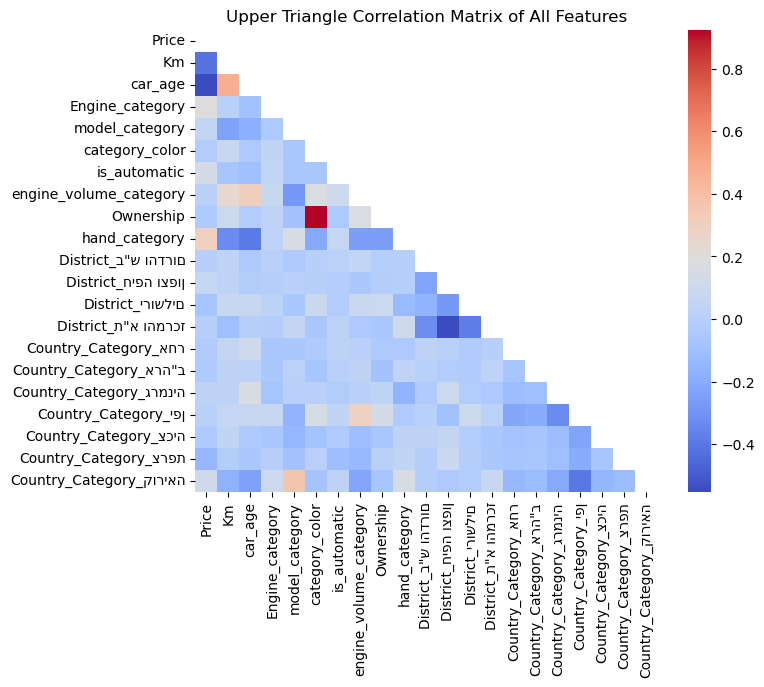

In [7]:
df = data.copy()
#Convert categorical variables to numeric
label_encoder = LabelEncoder()
categorical_columns = ['Engine_category','model_category']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

df = pd.get_dummies(df, columns=['District', 'Country_Category'], drop_first=False)

#Correlations between all variables in the data
corr_matrix = df.corr()

# Select the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create a heatmap of the upper triangle of the correlation matrix with annotation and smaller size
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8}, square=True)
plt.title('Upper Triangle Correlation Matrix of All Features')
plt.show()   

*According to variance calculation:*

In [8]:
variances = df.var()
variances

Price                      4.796900e+08
Km                         6.497790e+09
car_age                    1.453047e+01
Engine_category            4.743083e-02
model_category             5.735942e-01
category_color             2.481601e-01
is_automatic               5.005231e-02
engine_volume_category     7.815638e-01
Ownership                  2.497094e-01
hand_category              6.136176e-01
District_ב"ש והדרום        1.059145e-01
District_חיפה וצפון        2.038077e-01
District_ירושלים           1.356876e-01
District_ת"א והמרכז        2.456960e-01
Country_Category_אחר       6.587913e-02
Country_Category_ארה"ב     5.362572e-02
Country_Category_גרמניה    1.259881e-01
Country_Category_יפן       2.369395e-01
Country_Category_צכיה      7.382898e-02
Country_Category_צרפת      5.421816e-02
Country_Category_קוריאה    1.612273e-01
dtype: float64

In [9]:
df.columns

Index(['Price', 'Km', 'car_age', 'Engine_category', 'model_category',
       'category_color', 'is_automatic', 'engine_volume_category', 'Ownership',
       'hand_category', 'District_ב"ש והדרום', 'District_חיפה וצפון',
       'District_ירושלים', 'District_ת"א והמרכז', 'Country_Category_אחר',
       'Country_Category_ארה"ב', 'Country_Category_גרמניה',
       'Country_Category_יפן', 'Country_Category_צכיה',
       'Country_Category_צרפת', 'Country_Category_קוריאה'],
      dtype='object')

**Car price prediction**

We started to select features in order to reduce the overfitting to the model. to find the best possible model with the lowest RMSE.
By manually experimenting each time with a different column, according to the correlation analysis we received above, and according to the variance - we saw which features affect the RMSE, and features that raised the RMSE we lowered them

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.667e+10, tolerance: 5.775e+07
  model = cd_fast.enet_coordinate_descent(


Best parameters found: {'alpha': 100, 'l1_ratio': 1.0, 'max_iter': 1000}
RMSE: 12961.772705838266


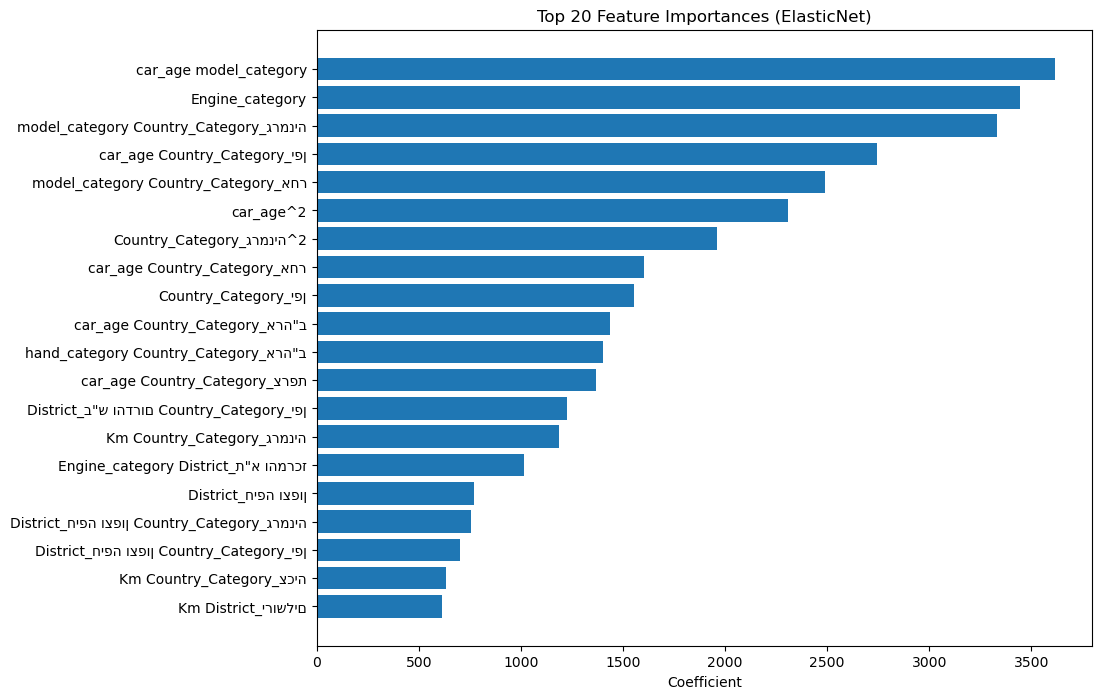

                                   Feature   Coefficient
31                  car_age model_category   3615.004655
2                          Engine_category   3446.895484
64  model_category Country_Category_גרמניה   3331.939831
40            car_age Country_Category_יפן   2746.438311
62     model_category Country_Category_אחר   2489.262773
..                                     ...           ...
32                   car_age hand_category  -1805.483729
19                        Km hand_category  -1867.758298
21                  Km District_חיפה וצפון  -2273.477838
0                                       Km  -5984.640824
1                                  car_age -14923.827344

[128 rows x 2 columns]


In [10]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.metrics import mean_squared_error

#Selected features
X = df.drop(['Price', 'category_color','engine_volume_category','Ownership','Country_Category_קוריאה','is_automatic'], axis=1) #RMSE: 12961.772705838266
y = df['Price']

#Distribution of the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Normalization of the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#We added polynomial variables because from our testing it improves the performance of the linear model by adding new features that represent non-linear relationships between the existing features. Compared to the model without the addition of the polynomial variables that brought us a bigger error
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

lasso = Lasso(alpha=0.01, max_iter=5000, random_state=42)
lasso.fit(X_train_poly, y_train)

# Selecting properties with non-zero coefficients
selected_features = lasso.coef_ != 0
X_train_selected = X_train_poly[:, selected_features]
X_test_selected = X_test_poly[:, selected_features]

#We chose to use "Grid Search", which searches for the best parameters for a machine learning model.
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0],
    'max_iter': [1000, 5000, 10000]
}

elastic_net = ElasticNet(random_state=42)
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_selected, y_train)

# Displaying the optimal parameters
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

#Training the model
best_elastic_net = grid_search.best_estimator_
best_elastic_net.fit(X_train_selected, y_train)

#prediction
y_pred_selected = best_elastic_net.predict(X_test_selected)

#RMSE calculation
selected_rmse = np.sqrt(mean_squared_error(y_test, y_pred_selected))
print(f"RMSE: {selected_rmse}")


# חשיבות המאפיינים
coefficients = best_elastic_net.coef_

# קבלת שמות המאפיינים
feature_names = poly.get_feature_names_out(input_features=X.columns)
selected_feature_names = np.array(feature_names)[selected_features]

# יצירת DataFrame עבור חשיבות המאפיינים
feature_importance_df = pd.DataFrame({
    'Feature': selected_feature_names,
    'Coefficient': coefficients
})

# מיון המאפיינים לפי החשיבות
feature_importance_df = feature_importance_df.sort_values(by='Coefficient', ascending=False)

# גרף של 20 המאפיינים החשובים ביותר
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'].head(20), feature_importance_df['Coefficient'].head(20))
plt.gca().invert_yaxis()
plt.xlabel('Coefficient')
plt.title('Top 20 Feature Importances (ElasticNet)')
plt.show()

print(feature_importance_df)


In [11]:

# Retrieve the best estimator from GridSearchCV
best_estimator = grid_search.best_estimator_

# Retrieve the coefficients from the ElasticNet model
coefficients = best_estimator.coef_

# Fit PolynomialFeatures to the training data
poly.fit(X_train_scaled)  # Fit the polynomial transformer to the scaled training data

# Get the names of the polynomial features
numerical_cols = X.columns
poly_feature_names = poly.get_feature_names_out(input_features=numerical_cols)

# Get the names of the selected features
selected_poly_feature_names = np.array(poly_feature_names)[selected_features]

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': selected_poly_feature_names,
    'Coefficient': coefficients
})

# Sort the DataFrame by the absolute value of the coefficients
feature_importance_df['AbsCoefficient'] = feature_importance_df['Coefficient'].abs()
feature_importance_df = feature_importance_df.sort_values(by='AbsCoefficient', ascending=False)

# Display the sorted DataFrame of feature importance
feature_importance_df


,Feature,Coefficient,AbsCoefficient
1,car_age,-14923.827344,14923.827344
0,Km,-5984.640824,5984.640824
31,car_age model_category,3615.004655,3615.004655
2,Engine_category,3446.895484,3446.895484
64,model_category Country_Category_גרמניה,3331.939831,3331.939831
...,...,...,...
23,Km Country_Category_אחר,-0.000000,0.000000
18,Km model_category,0.000000,0.000000
96,District_ירושלים^2,-0.000000,0.000000
97,"District_ירושלים District_ת""א והמרכז",0.000000,0.000000


**conclusions-**

You can see from the graph that the five factors that had the most influence are mileage, vehicle age, Engine_category, and the country of manufacture, Germany and Japan

The age of the vehicle and the mileage have a negative effect, everything else has a positive effect